# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [145]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# library for machine learning classification models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [146]:
# URL of the raw CSV files from the GitHub repository
tehranhouse_df = "https://raw.githubusercontent.com/destianiic/proyek-ml/refs/heads/main/tehranhouse_data.csv"

# Load dataset
tehranhouse = pd.read_csv(tehranhouse_df, header=0)

# check dataset
tehranhouse.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Price_Category,Cluster
0,0.036707,1,1,1,1,156,1.850000e+09,61666.67,Low,0
1,0.033370,1,1,1,1,156,1.850000e+09,61666.67,Low,0
2,0.054505,2,1,1,1,117,5.500000e+08,18333.33,Low,0
3,0.072303,2,1,1,1,152,9.025000e+08,30083.33,Low,0
4,0.103448,2,1,1,1,150,7.000000e+09,233333.33,High,4


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [147]:
# splitting dataset
X = tehranhouse.drop(columns=['Cluster'])
y = tehranhouse['Cluster']

# define the categorical data
price_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# apply label encoding
X['Price_Category'] = X['Price_Category'].map(price_mapping)
X['Price_Category'] = X['Price_Category'].astype('int64')

# split the dataset into training and testing sets (typically 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Optionally, display the shape of the splits
print(f"Training set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set: X_train: (2593, 9), y_train: (2593,)
Test set: X_test: (649, 9), y_test: (649,)


In [148]:
# Check data types once again after cleaning
print(X.dtypes)

Area              float64
Room                int64
Parking             int64
Warehouse           int64
Elevator            int64
Address             int64
Price             float64
Price(USD)        float64
Price_Category      int64
dtype: object


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [149]:
# create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=50)
rf_classifier.fit(X_train, y_train)

# make predictions on the train set
y_pred = rf_classifier.predict(X_train)

# evaluate the model
print("Accuracy:", accuracy_score(y_train, y_pred))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1779
           1       1.00      1.00      1.00       207
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00       538

    accuracy                           1.00      2593
   macro avg       1.00      1.00      1.00      2593
weighted avg       1.00      1.00      1.00      2593



Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [150]:
# prediction with test set
y_pred = rf_classifier.predict(X_test)

# the the prediction
print("Predictions:", y_pred)

Predictions: [0 1 0 0 0 0 1 0 0 0 0 0 0 0 4 0 1 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0
 0 0 0 0 4 4 0 0 1 0 4 0 0 0 4 0 1 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 4 4 4 0 0 4 4 1 0 4 0 4 0 0 0 0 0 1 0 1 0 0 0 0 4 1 1
 1 0 0 0 1 0 0 0 4 0 0 0 1 0 0 0 0 0 2 0 4 4 0 0 0 0 0 4 4 0 2 0 4 4 4 4 0
 4 0 0 0 0 0 4 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0 0 0 4 4 0 4 0 4 0
 0 0 0 0 2 0 4 0 0 1 0 0 0 0 0 0 4 0 0 4 0 0 0 4 4 4 0 0 0 4 0 0 0 0 0 4 0
 4 4 0 0 0 0 0 4 0 0 0 4 4 0 0 4 0 0 0 0 1 0 4 0 0 4 0 4 0 1 0 0 1 4 1 1 4
 0 4 4 0 0 0 0 0 4 0 0 0 0 0 0 0 0 4 2 0 0 1 4 0 0 0 0 0 0 1 0 0 0 0 0 0 4
 1 0 4 0 0 0 0 0 2 0 0 0 0 4 0 0 4 0 0 0 0 0 2 4 0 0 0 0 2 0 0 1 0 0 0 0 0
 0 4 0 0 0 0 0 0 0 0 4 0 0 4 4 0 0 4 3 1 0 4 0 2 0 0 1 0 0 0 1 4 0 0 0 2 1
 1 0 0 0 0 0 0 1 0 4 1 0 0 4 4 0 4 0 0 0 4 1 0 4 0 1 0 0 1 0 1 0 0 2 0 0 0
 1 0 4 4 0 0 0 0 0 1 4 0 0 1 4 4 4 4 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 4 0 0
 0 4 0 0 0 4 0 1 4 4 0 0 4 0 4 0 3 1 0 4 0 4 1 0 0 0 0 0 0 0 4 4 0 4 0 0 0
 0 0 4 0 0 0

In [151]:
# metric evaluation (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [152]:
# metric evaluation (classification report)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       452
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00       129

    accuracy                           1.00       649
   macro avg       1.00      1.00      1.00       649
weighted avg       1.00      1.00      1.00       649



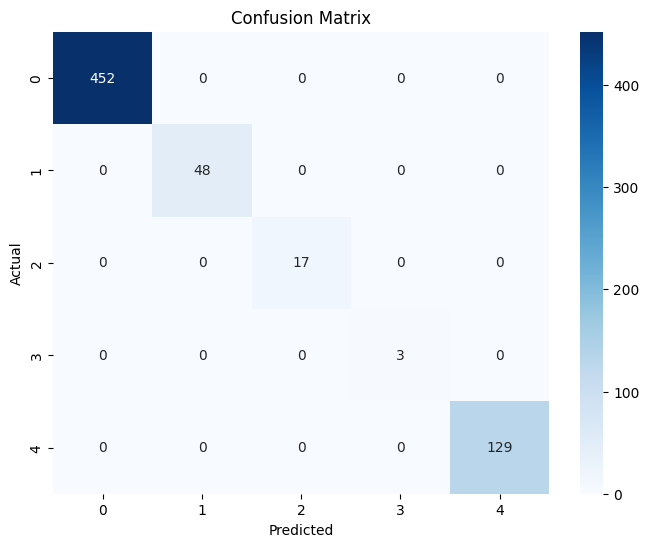

In [153]:
# confussion matrix

cm = confusion_matrix(y_test, y_pred)

# show cm with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [154]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [155]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Identifikasi model: berdasarkan hasil test model terhadap train set dan test set tidak ditemukan bahwa model overfitting maupun underfitting karena pada kedua set data tersebut semuanya menghasilkan hasil report yang tinggi, dimana untuk train set sebesar 1 untuk setiap cluster, dan untuk uji di test set nilai hasil sebesar 1.0 untuk semua cluster, tapi model ini menunjukkan bahwa model sudah baik dan mampu digunakan pada dataset selain data uji. Kelemahannya mungkin terdapat distribusi jumlah dataset yang tidak merata untuk masing-masing cluster, dimana cluster 0 memiliki jumlah dataset paling banyak dibandingkan cluster lainnya, dan cluster 2 dan 3 yang memiliki jumlah dataset yang sangat sedikit dibandingkan dengan cluster lainnya yang ditunjukkan oleh nilai support pada classification report dimana cluster 2 sebanyak 17 dan cluster 3 sebanyak 3. Tetapi, walaupun begitu model tetap dapat melakukan klasifikasi dengan baik yang ditunjukkan dengan nilai f1-score untuk masing-masing cluster sebesar 1.00.